### ARPU(Average Revenue Per User)

: 인당 평균 매출/
말 그대로  사용자 1명당 매출   
user_id를 nunique() 한 값으로 전체 매출을 나누면 된다.

​

### ARPPU(Average Revenue Per Paying User)

:  결제자 인당 평균 매출로 

위에 ARPU 달리 결제자  만  대상으로 함  
구매한 사람의 nunique() 값으로 전체 매출을 나누면 된다  
[출처] [WIL] 데이터 분석가도 알아야 해요 마케팅 용어1|작성자 어쩌다 망상가  


​


### DAU(​Daily Active Users)

:하루 동안 해당 서비스를 이용한 순수한 이용자 수를 나타내는 지표.   
날짜별 그룹화하여 user_id를 nunique하면 된다.


​


### MAU(​Monthly Active Users)

:한 달 동안 해당 서비스를 이용한 순수한 이용자 수를 나타내는 지표.  

달로 그룹화하여 user_id를 nunique() 하면 된다.  
[출처] [WIL] 데이터 분석가도 알아야 해요 마케팅 용어1|작성자 어쩌다 망상가


​


RFM 분석은 고객 분석 방법 중 하나로, 고객의 거래 내역 데이터를 기반으로 고객을 분류하는 기법입니다.  
RFM은 Recency, Frequency, Monetary의 약어로 각각 최근성, 빈도, 금액을 의미합니다.  

- Recency(최근성) : 고객이 얼마나 최근에 구매를 했는지를 나타내며, 최근 구매일수록 점수가 높게 부여됩니다. 

- Frequency(빈도) : 고객이 일정 기간 동안 구매한 빈도를 나타내며, 구매 횟수가 많을수록 점수가 높게 부여됩니다. 

- Monetary(금액) : 고객이 일정 기간 동안 구매한 총 금액을 나타내며, 구매 금액이 많을수록 점수가 높게 부여됩니다.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [5]:
file_oct = 'data/2019-Oct_downcast.parquet.gzip'
file_nov = 'data/2019-Nov_downcast.parquet.gzip'

In [7]:
df_oct = pd.read_parquet(file_oct)
df_nov = pd.read_parquet(file_nov)

df_oct.shape, df_nov.shape

((42448764, 7), (67501979, 7))

In [8]:
df_oct = df_oct.sample(1000000)
df_nov = df_nov.sample(1000000)

In [9]:
temp_list=[df_oct, df_nov]

df = pd.concat(temp_list)
df.shape

(2000000, 7)

In [10]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id', 'brand',
       'price', 'user_id'],
      dtype='object')

### ARPU
- user_id를 nunique() 한 값으로 전체 매출을 나누면 된다.

In [11]:
# price에 음수가 없다.
df.describe()

,product_id,category_id,price,user_id
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,1.152671e+07,2.057640e+18,2.913590e+02,5.360797e+08
std,1.484455e+07,1.929241e+16,3.564713e+02,2.098970e+07
min,1.000978e+06,2.053014e+18,0.000000e+00,2.951588e+07
25%,1.005239e+06,2.053014e+18,6.744000e+01,5.162049e+08
50%,5.100375e+06,2.053014e+18,1.649300e+02,5.320238e+08
75%,1.690004e+07,2.053014e+18,3.601100e+02,5.553521e+08
max,1.000284e+08,2.187708e+18,2.574070e+03,5.799675e+08


In [19]:
df['event_type'].unique()

['view', 'purchase', 'cart']
Categories (3, object): ['cart', 'purchase', 'view']

In [25]:
df['event_time'].head(5).astype(str).str[:7] == '2019-10'

39852037    True
37171442    True
11254167    True
42304852    True
15041714    True
Name: event_time, dtype: bool

In [17]:
df_temp = pd.DataFrame({'ARPU': [0, 0],
                        'ARPPU':[0, 0]},
                       index=['2019-10', '2019-11'])

In [28]:
# ARPU
df_temp.iloc[0, 0] = (df.loc[(df['event_time'].astype(str).str[:7] == '2019-10')
                            &(df['event_type'] == 'purchase'), 'price'].sum() / 
                      df.loc[df['event_time'].astype(str).str[:7] == '2019-10', 'user_id'].nunique())

df_temp.iloc[1, 0] = (df.loc[(df['event_time'].astype(str).str[:7] == '2019-11')
                            &(df['event_type'] == 'purchase'), 'price'].sum() / 
                      df.loc[df['event_time'].astype(str).str[:7] == '2019-11', 'user_id'].nunique())

In [31]:
# ARPPU
df_temp.iloc[0, 1] = (df.loc[(df['event_time'].astype(str).str[:7] == '2019-10')
                            &(df['event_type'] == 'purchase'), 'price'].sum() / 
                      df.loc[(df['event_time'].astype(str).str[:7] == '2019-10')&
                             (df['event_type'] == 'purchase'), 'user_id'].nunique())

df_temp.iloc[1, 1] = (df.loc[(df['event_time'].astype(str).str[:7] == '2019-11')
                            &(df['event_type'] == 'purchase'), 'price'].sum() / 
                      df.loc[(df['event_time'].astype(str).str[:7] == '2019-11')&
                             (df['event_type'] == 'purchase'), 'user_id'].nunique())

In [32]:
df_temp.round(2)

,ARPU,ARPPU
2019-10,8.90,328.98
2019-11,6.58,316.76


### DAU, MAU
- 날짜별 그룹화하여 user_id를 nunique하면 된다.
- 달로 그룹화하여 user_id를 nunique() 하면 된다.

In [35]:
df['day'] = df['event_time'].astype(str).str[:10]
df['day']

39852037    2019-10-29
37171442    2019-10-27
11254167    2019-10-09
42304852    2019-10-31
15041714    2019-10-12
               ...    
51467325    2019-11-21
46737640    2019-11-18
57810319    2019-11-25
5217831     2019-11-04
21285178    2019-11-13
Name: day, Length: 2000000, dtype: object

In [36]:
df['month'] = df['event_time'].dt.month
df['month']

39852037    10
37171442    10
11254167    10
42304852    10
15041714    10
            ..
51467325    11
46737640    11
57810319    11
5217831     11
21285178    11
Name: month, Length: 2000000, dtype: int64

In [38]:
df_dau = df.groupby('day').agg({'user_id' : 'nunique'})
df_dau

,user_id
day,
2019-10-01,23928
2019-10-02,23157
2019-10-03,21699
2019-10-04,27317
2019-10-05,25198
...,...
2019-11-26,21315
2019-11-27,21246
2019-11-28,21440


<AxesSubplot:xlabel='day', ylabel='user_id'>

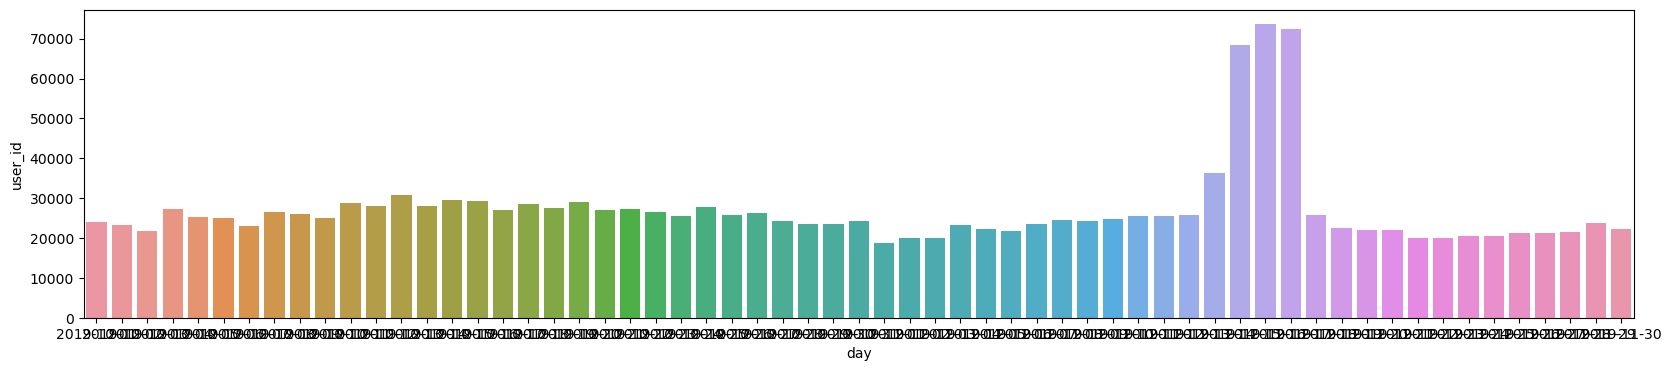

In [64]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_dau.iloc[:10], x=df_dau.index, y = df_dau['user_id'])

<AxesSubplot:xlabel='day', ylabel='user_id'>

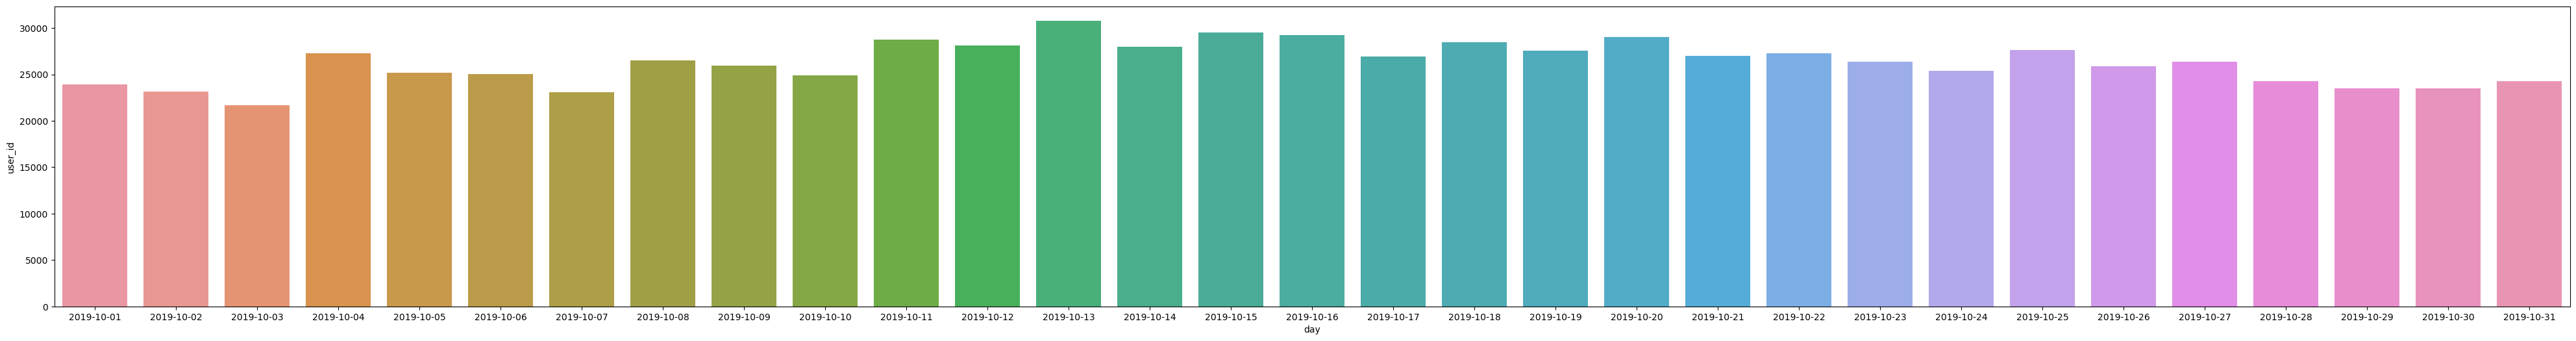

In [71]:
df_dau_oct = df_dau.iloc[:31]
plt.figure(figsize=(50, 6))
sns.barplot(data=df_dau_oct, x=df_dau_oct.index, y = df_dau_oct['user_id'])

<AxesSubplot:xlabel='day', ylabel='user_id'>

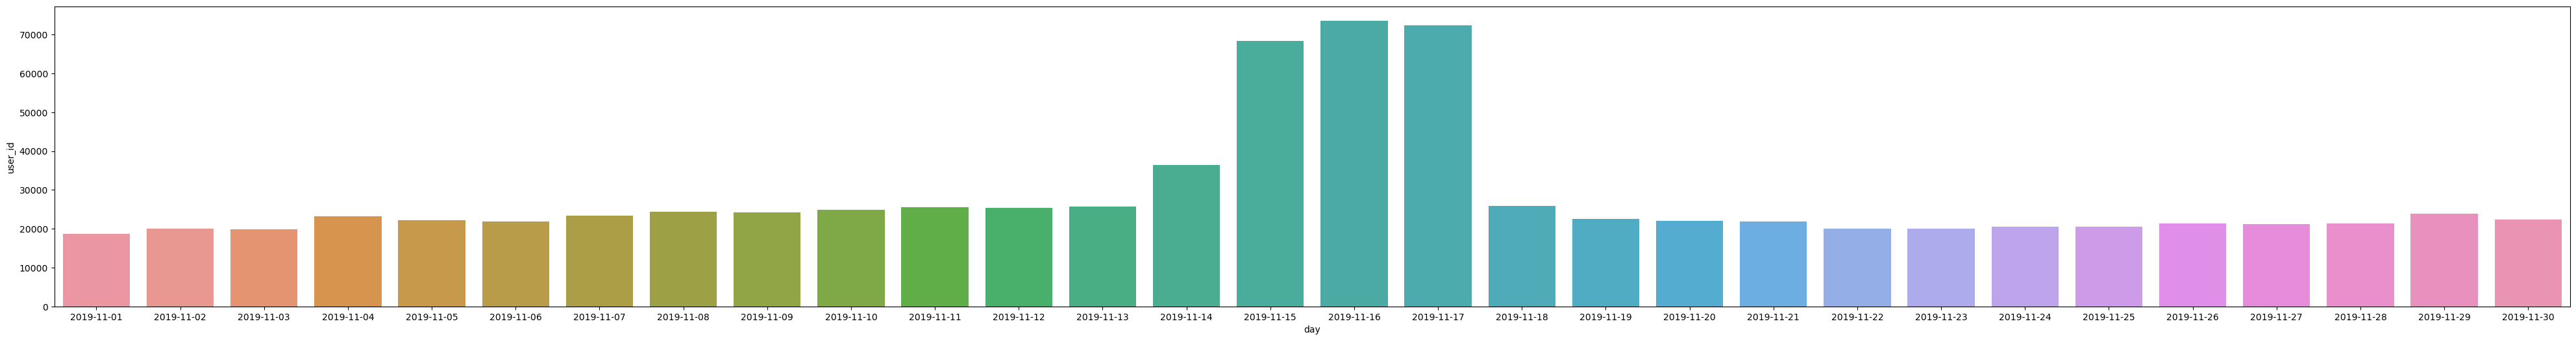

In [72]:
df_dau_nov = df_dau.iloc[31:]
plt.figure(figsize=(50, 6))
sns.barplot(data=df_dau_nov, x=df_dau_nov.index, y = df_dau_nov['user_id'])

<AxesSubplot:xlabel='month'>

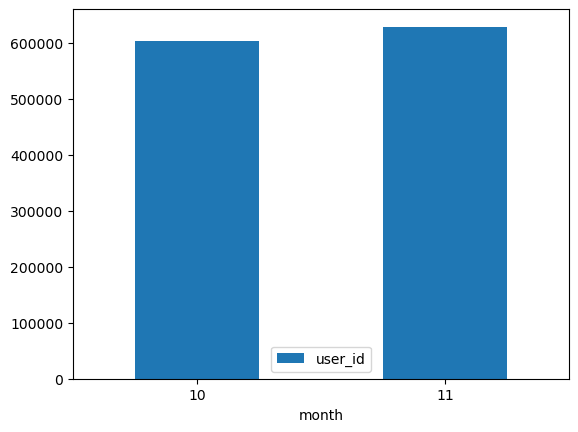

In [77]:
df_mou = df.groupby('month').agg({'user_id':'nunique'})
df_mou.plot.bar(rot=0)